# Análise Exploratória dos Dados

Nesta etapa iremos analisar como estão distribuidos os dados e ver se há ruídos nos dados

In [2]:
# importando bibliotecas
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Dicionário de Dados

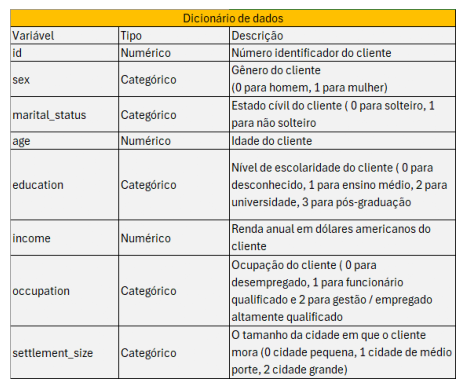

In [3]:
# importa imagem do dicionário de dados
img = mpimg.imread(os.getcwd().replace('code', 'docs') + '\\data_dict_cluster.png')

plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# definindo dataframe
data = pd.read_csv(os.getcwd().replace('code','data') +'\\raw\\segmentation_data.csv')

### Analizando os tipos de dados e fazendo pequenos ajustes

In [5]:
# ajustando nome das colunas
data.columns = data.columns.str.replace(' ', '_').str.lower()

data.head()

,id,sex,marital_status,age,education,income,occupation,settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2000 non-null   int64
 1   sex              2000 non-null   int64
 2   marital_status   2000 non-null   int64
 3   age              2000 non-null   int64
 4   education        2000 non-null   int64
 5   income           2000 non-null   int64
 6   occupation       2000 non-null   int64
 7   settlement_size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
data.isnull().sum()

id                 0
sex                0
marital_status     0
age                0
education          0
income             0
occupation         0
settlement_size    0
dtype: int64

In [8]:
data.duplicated().sum()

0

- Os dados apresentam tipagem correta
- Não há dados duplicados nem dados nulos

### Analizando as distribuições dos dados

In [9]:
data.describe()

,id,sex,marital_status,age,education,income,occupation,settlement_size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


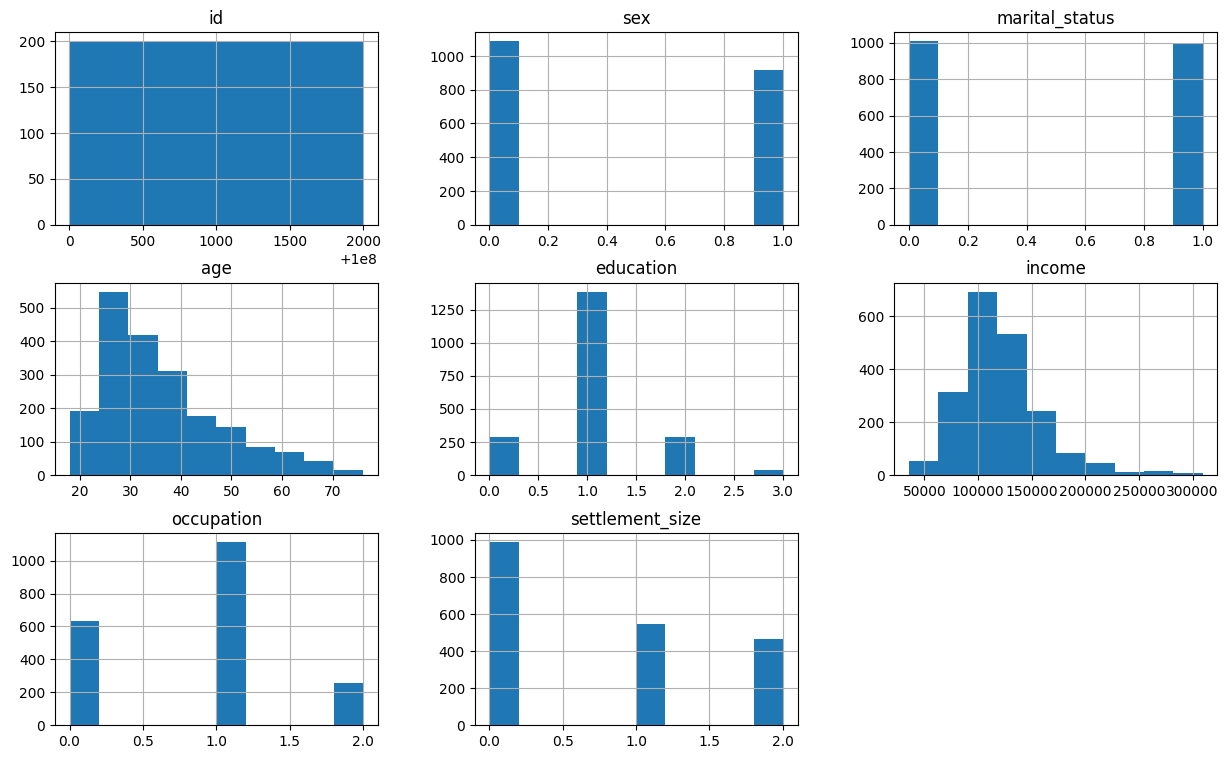

In [10]:
# cria histograma para vizualisar a distribuição dos dados
data.hist(figsize=(15,9));

- Analizando préviamente a distribuição dos dados notamos que a coluna `age` e `income` apresentam uma cauda longa e uma certa tentência ao lado esquedo do gráfico. Com o intuito de normalizar essa distribuição utilizaremos o método estatístico de logarítmo a fim de encontra essa normal na distribuição. 
- Este método é utilizado em caso de dados com distribuição desiguais, e funciona diminuindo a escala dos valores.

In [11]:
# aplicando log nas colunas com caudas longas
data['age'] = np.log(data['age'])
data['income'] = np.log(data['income'])

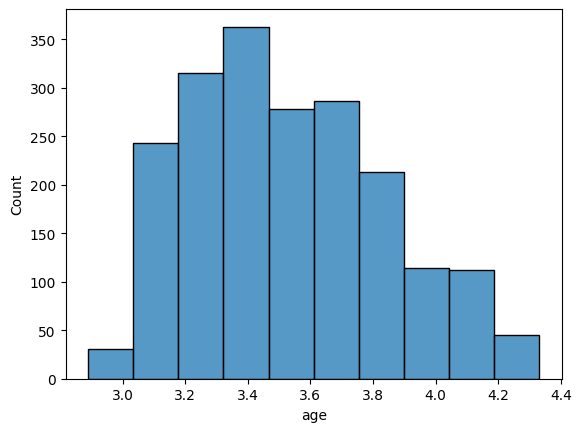

In [12]:
sns.histplot(data['age'], bins=10)
plt.show()

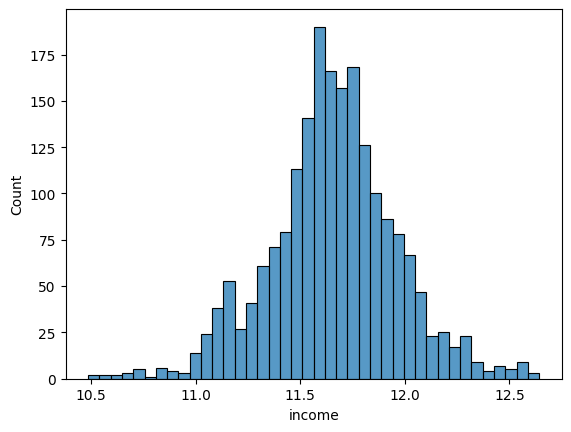

In [13]:
sns.histplot(data['income'])
plt.show()

- Note que agora as colunas apresentam uma distribuição mais próxima da normal, isso é bastante importante para nosso modelo de machine learning pois elntende melhor os padrões dos dados e evita o enviesamento dos mesmos. 

## Comparando proporções de classes

In [14]:
# criando dataframe com valores categóricos nominais para melhor vizualização nos gráficos
data_cat = data.copy()

data_cat['sex'] = data_cat['sex'].replace(0,'Homem').replace(1,'Mulher')
data_cat['marital_status'] = data_cat['marital_status'].replace(0,'Solteiro').replace(1,'Não Solteiro')
data_cat['education'] = data_cat['education'].replace(0,'Desconhecido').replace(1,'Ensino Médio').replace(2,'Universidade').replace(3, 'Pós-Graduação')
data_cat['occupation'] = data_cat['occupation'].replace(0, 'Desempregado').replace(1,'Empregado Qualificado').replace(2, 'Empregado Altamente Qualificado')
data_cat['settlement_size'] = data_cat['settlement_size'].replace(0, 'Cidade Pequena').replace(1,'Cidade de Médio Porte').replace(2, 'Cidade Grande')

#### Vizualizando colunas separadamente

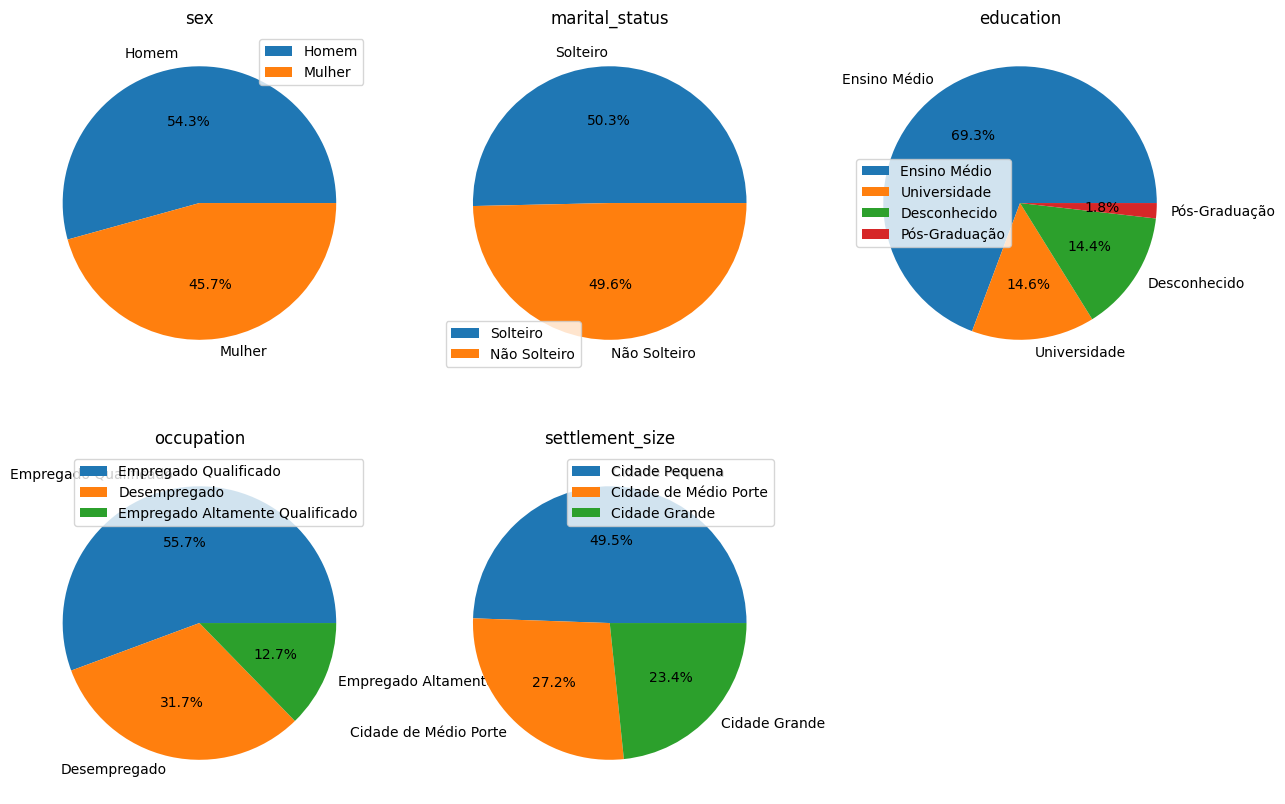

In [15]:
# define as colunas categóricas para os gráficos
columns = ['sex', 'marital_status', 'education', 'occupation', 'settlement_size']

# cria subplotagens para cada coluna
plt.figure(figsize=(15,10))

for col in range(len(columns)):
    plt.subplot(2, 3, col+1)
    plt.title(columns[col])
    
    # plota gráfico de pizza
    counts = data_cat[columns[col]].value_counts()
    plt.pie(counts, labels=counts.index, autopct = '%1.1f%%')
    
    # adiciona as legendas
    plt.legend(counts.index)

plt.show()

 - `sex`: Há uma porcentagem maior de homens nos nossos registros.
 - `marital_status`: Não apresenta uma diferença muito grande entre as classes.
 - `education`: A esmagadora maioria das pessoas tem o ensino médio em andamento ou completo, seguido de uma parte menor de universitários. No entando quase 15% das pessoas tem educação desconhecida.
 - `occupation`: Metade dos dados são empregados qualificados enquanto a outra metade se divide entre desempregados e empregados altamente qualificados.
 - `settlement_size`: A grande parte das pessoas residem em cidades pequenas, a outra metade dos dados é equilibrada entre cidade de médio porte e cidade grande. 

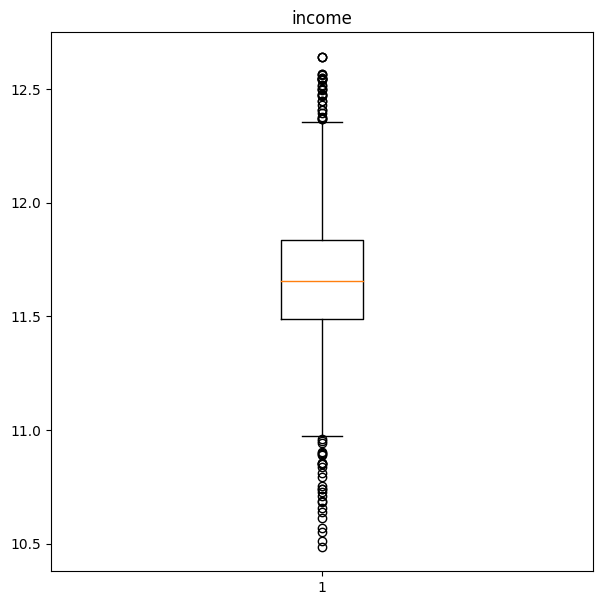

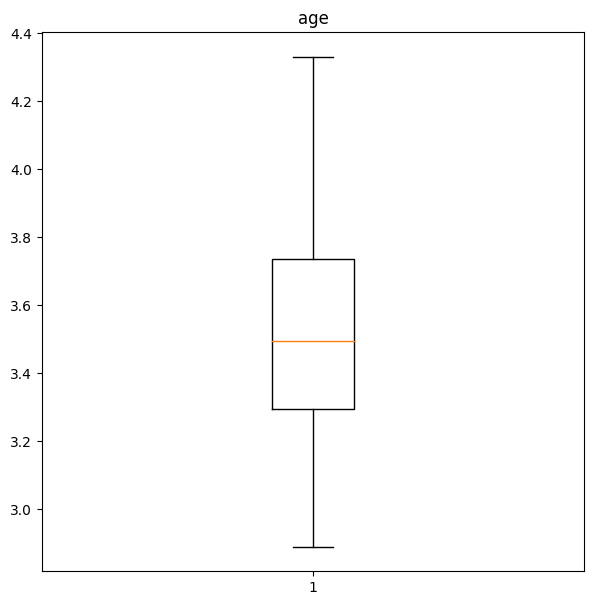

In [16]:
for col in data[['income', 'age']]:
    plt.figure(figsize=(7,7))
    plt.boxplot(data[col])
    plt.title(f'{col}')
    plt.show()

- Em `income` conseguimos perceber alguns outliers, futuramente no nosso pré-processamento de dados iremos calcular o intervalo interquartílico para cortar alguns desses ruídos.

In [17]:
# exportando dados já processados
path = 'c:\\Users\\God\\Desktop\\DieGod\\Projetos\\segmentacao-clientes\\data\\processed\\data_processed.csv'
data.to_csv(path, index=False)